In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob, os
from datetime import datetime
import SimpleITK as sitk
from MRLCinema.readcine.readcines import readcines, read_single_cine
import pydicom


cine dir [1.0, 0.0, 0.0, 0.0, 0.0, -1.0]
(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0)
(336, 336, 1)
(-160.21499556303, 51.2000007629395, 208.014996707439)
(1.29799997806549, 1.29799997806549, 5.0)
(274.61499708890915, 51.2000007629395, -226.81499594450017)

(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0)
(336, 336, 1)
(-160.21499556303024, 51.20000076293946, 208.01499670743942)
(1.2979999780654907, 1.2979999780654907, 5.0)
(274.61499708890915, 51.20000076293946, -226.81499594449997)


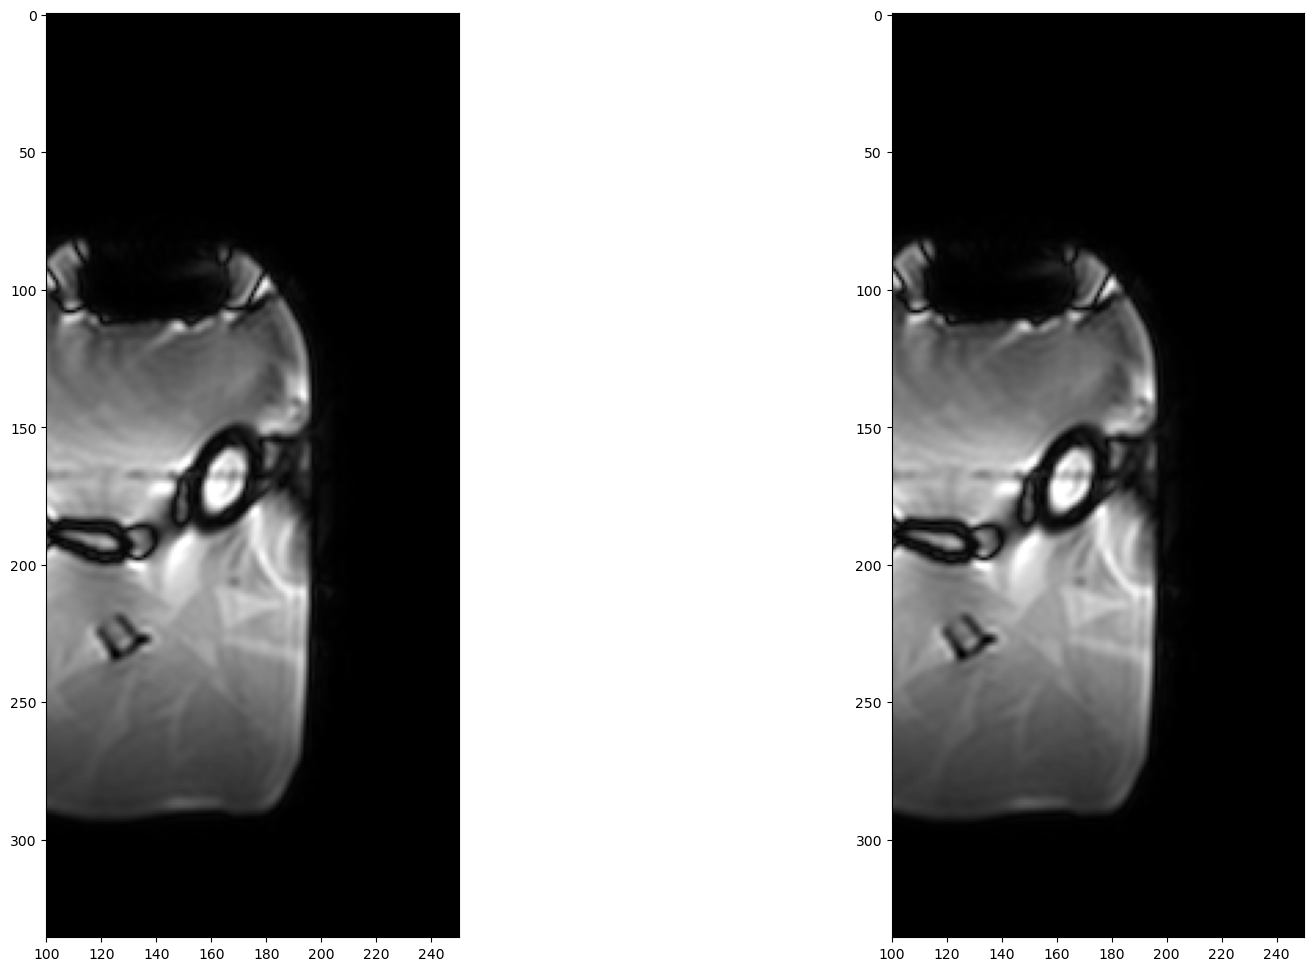

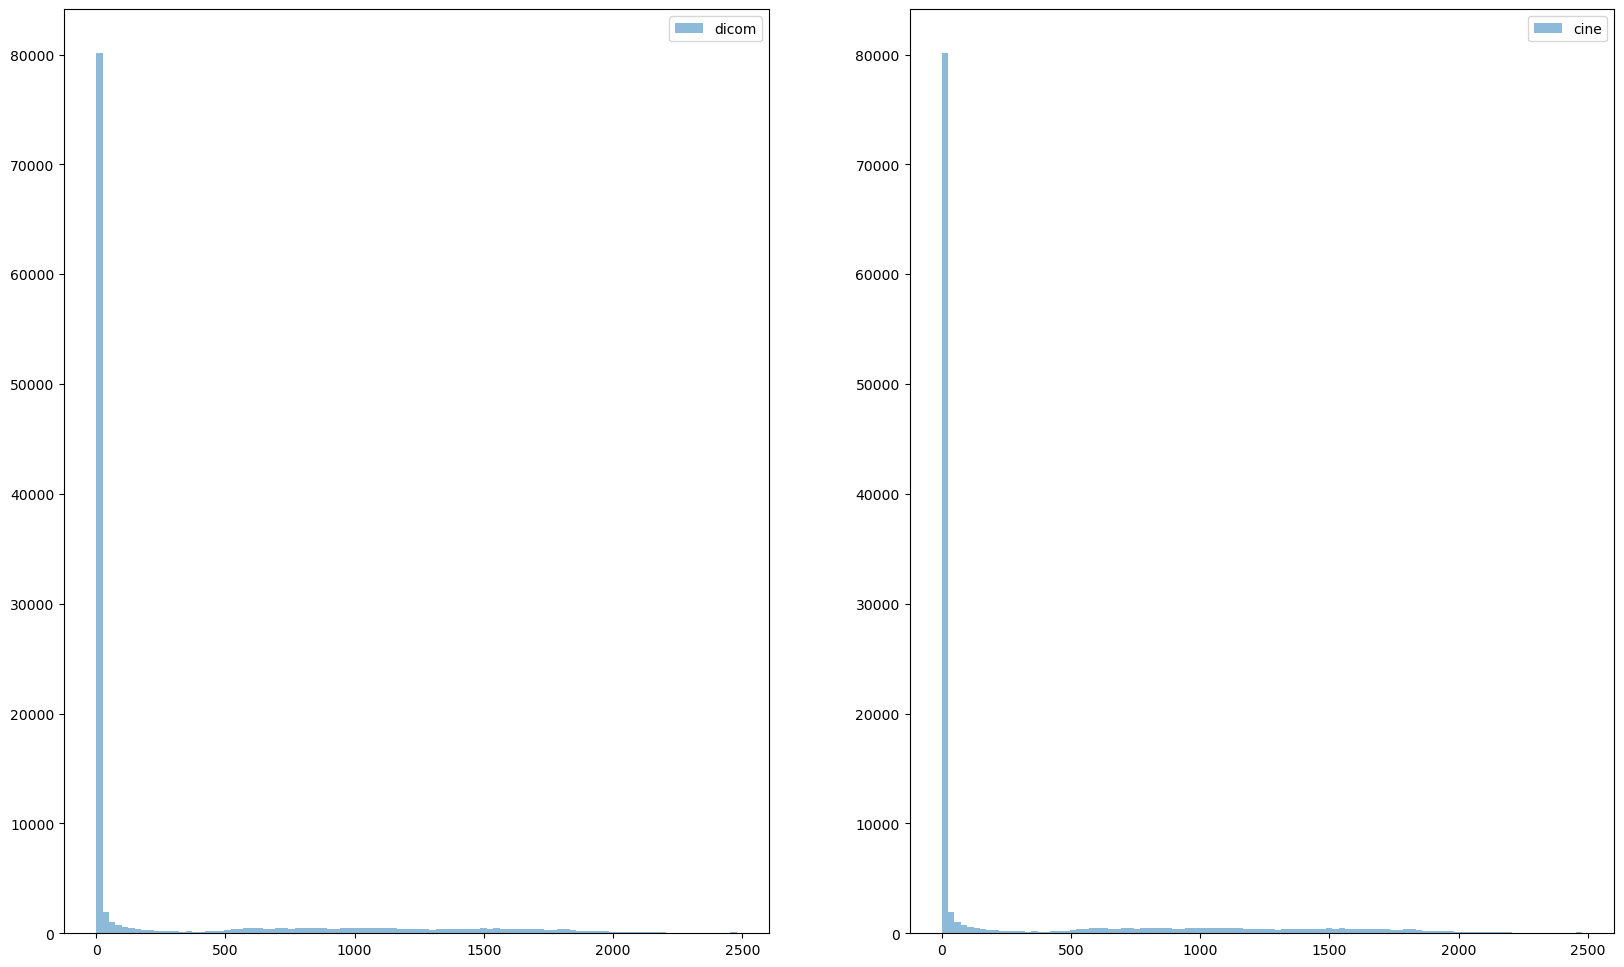

In [8]:
path_to_cines = '/mnt/P/TERAPI/FYSIKER/David_Tilly/cine_conversion/phantom/bin'
path_to_dicom = '/mnt/P/TERAPI/FYSIKER/David_Tilly/cine_conversion/phantom/dicom'

path_to_dicom = '/home/david/source/MRLCinema/testdata/coronal'
path_to_cines = '/home/david/source/MRLCinema/testdata/coronal'
cine_name = 'Frame_ID_0a711e94-5490-437b-9221-ef4cd551dcd3_224.8498_(ms)'

#path_to_dicom = '/home/david/source/MRLCinema/testdata/transversal'
#path_to_cines = '/home/david/source/MRLCinema/testdata/transversal'
#cine_name = 'Frame_ID_0aaf0d26-2194-49f4-8347-cb4ed6bed48c_231.3946_(ms)'

#path_to_dicom = '/home/david/source/MRLCinema/testdata/sagittal'
#path_to_cines = '/home/david/source/MRLCinema/testdata/sagittal'
#cine_name = 'Frame_ID_0a503b9b-9cb8-43a5-ad95-b888dd3e28f9_698.4829_(ms)'

cine = read_single_cine(os.path.join(path_to_cines, f'{cine_name}.bin'))

dicom  = sitk.ReadImage(os.path.join(path_to_dicom, f'{cine_name}.dcm'))
print(dicom.GetDirection())
print(dicom.GetSize())
print(dicom.GetOrigin())
print(dicom.GetSpacing())
print(dicom.TransformIndexToPhysicalPoint([335, 335, 0]))

print()
print(cine.image.GetDirection())
print(cine.image.GetSize())
print(cine.image.GetOrigin())
print(cine.image.GetSpacing())
print(cine.image.TransformIndexToPhysicalPoint([335, 335, 0]))




f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,12))
im1 = ax1.imshow(sitk.GetArrayFromImage(dicom).reshape([336, 336]), cmap='gray')
im2 = ax2.imshow(sitk.GetArrayFromImage(cine.image).reshape([336, 336]), cmap='gray')
ax1.set_xlim([100,250])
ax2.set_xlim([100,250])

# f.colorbar(im1, ax=ax1)
# f.colorbar(im2, ax=ax2)

# ax1.set_xlim([50, 200])
# ax2.set_xlim([50, 200])

# ax1.set_ylim([100, 250])
# ax2.set_ylim([100, 250])




#np.max(sitk.GetArrayFromImage(dicom)) / 65535, np.max(sitk.GetArrayFromImage(cines.image)) / 255

#plt.scatter(sitk.GetArrayFromImage(dicom).reshape([336, 336]).flatten(), sitk.GetArrayFromImage(cines.image).T.flatten())

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,12))
ax1.hist(sitk.GetArrayFromImage(dicom).reshape([336, 336]).flatten(), bins=100, alpha=0.5, label='dicom')
ax2.hist(sitk.GetArrayFromImage(cine.image).flatten(), bins=100, alpha=0.5, label='cine')

ax1.legend()
ax2.legend()





In [3]:
pydicom.dcmread(os.path.join(path_to_dicom, f'{cine_name}.dcm'))

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 254
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.24530131398833523024824286688304026
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.8.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.8'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 5.0.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.2453013139883352302482428668830